## Assignment 4
### Question 2] Coding: Classification with the decision tree model
#### Write a self-contained and fully functional Jupyter Notebook that:

### a) Loads the necessary libraries to run (e.g., scikit-learn)


In [281]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### b) Loads the dataset “digits” (see below for description) from the scikit-learn example datasets package. 
##### digits is a dataset of a hadnwritten digits. Each feature is the intensity of one pixel of an 8x8 image 


In [284]:
# loads digits dataset
digits = load_digits()
#print(digits)

# create feature matrix
x = digits.data

# create target vector - what we are going to predict
y = digits.target
digits.target_names

# view the first observation's feature values 
x[0]

# view the first observation's feature values as matrix 
digits.images[0]



array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

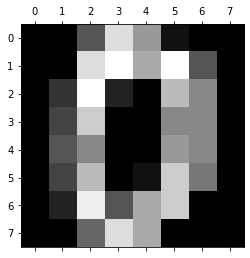

In [285]:
#visualize the observation's feature values as image
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### c) Instantiates a sklearn.tree.DecisionTreeClassifier. 

In [286]:
#class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)[source]¶

clf = tree.DecisionTreeClassifier(random_state = 1)
clf = clf.fit(digits.data, digits.target)

In [287]:
decision_tree = DecisionTreeClassifier()
print(decision_tree )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### d) Splits the dataset in training and testing sets using sklearn.model_selection.KFold cross validation (use K = 5).

In [288]:
kfold = KFold(n_splits=5)
kfold.get_n_splits(digits)
print(kf) 

<generator object _BaseKFold.split at 0x000001932EA382A0>


### e) Trains and tests the performance of the classifier in identifying the digits. 

In [289]:
for train_index, test_index in kfold.split(x):
    print('Train: %s, Test: %s' % (train_index, test_index))
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index] 

Train: [ 360  361  362 ... 1794 1795 1796], Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 

In [290]:
# simulate splitting a dataset of 20 observations into 5 folds

kf = KFold(n_splits=5, shuffle=False).split(range(5))
# print the contents of each training and testing set
print('{} {:^14} {}'.format('Iteration', 'Training', 'Testing '))
for iteration, data in enumerate(kf, start=1):
    print('{:^10} {} {:^22}'.format(iteration, data[0], str(data[1])))

Iteration    Training    Testing 
    1      [1 2 3 4]          [0]          
    2      [0 2 3 4]          [1]          
    3      [0 1 3 4]          [2]          
    4      [0 1 2 4]          [3]          
    5      [0 1 2 3]          [4]          


### f) Computes and outputs the accuracy for each of the K folds of cross validation. 

In [291]:
avg_accuracy = 0
for train_index, test_index in kfold.split(x):
    #print('Train: %s, Test: %s' % (train_index, test_index))
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index] 
    
    count = 0
    #clf = tree.DecisionTreeClassifier(random_state = 1)
    clf = clf.fit(x_train, y_train)
    predict = clf.predict (x_test)
    
    for i in range (0, len(predict)):
        if predict[i] == y_test[i]:
            count +=1
    accuracy = count/len(predict)
    print("accuracy for the K folds of cross validation:", accuracy)

accuracy for the K folds of cross validation: 0.7583333333333333
accuracy for the K folds of cross validation: 0.7416666666666667
accuracy for the K folds of cross validation: 0.8161559888579387
accuracy for the K folds of cross validation: 0.8495821727019499
accuracy for the K folds of cross validation: 0.8022284122562674


In [292]:
Accuracy_score = cross_val_score(KNeighborsClassifier(n_neighbors=5), x, y, cv=5, scoring='accuracy')
print(Accuracy_score )

[0.9478022  0.9558011  0.96657382 0.98039216 0.96338028]


### g) Computes and outputs the average accuracy across the K folds. 

In [300]:
    avg_accuracy  = (avg_accuracy  + accuracy)
Average = avg_accuracy  / 5
print("Average Accuracy:",Average)

Average Accuracy: 0.962674094707521


In [294]:
# use average accuracy as an estimate of out-of-sample accuracy
print(Accuracy_score .mean())

0.9627899114966898


In [295]:
Score = cross_val_score(clf, x_train, y_train, cv=5, scoring ='accuracy') 
print("Avg accuracy:", accuracy)
print("Accuracy: %0.3f (+/- %0.3f)" %(Score.mean(), Score.std()*2))

Avg accuracy: 0.8022284122562674
Accuracy: 0.791 (+/- 0.073)


[0.7909259704254555, 0.7909259704254555, 0.7909259704254555, 0.7909259704254555, 0.7909259704254555]


Text(0, 0.5, 'Cross-Validated Accuracy')

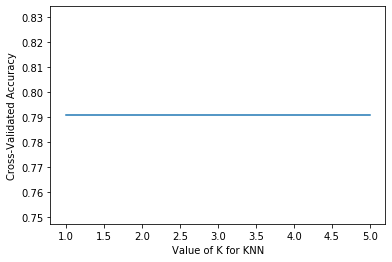

In [301]:
k_range = list(range(1, 6))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    Score = cross_val_score(clf, x_train, y_train, cv=5, scoring ='accuracy')
    k_scores.append(Score.mean())
print(k_scores)

import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Summary:
#### Commands: pip install scikit-learn or conda install scikit-learn